Rate constant k = 0.05458 h⁻¹
R² = 0.9923


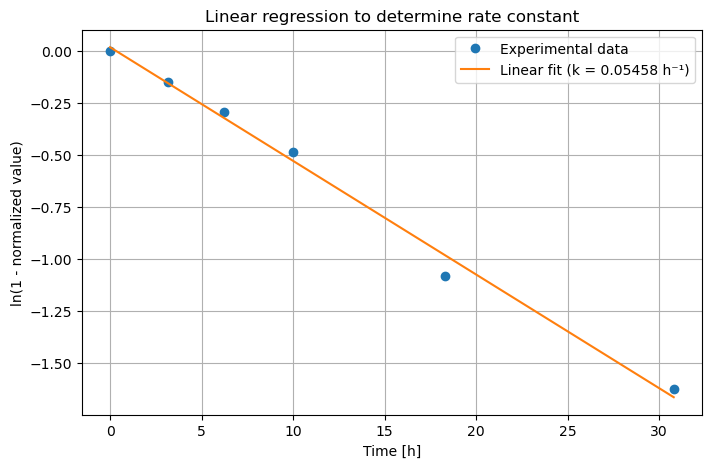

In [1]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Time [hours] and measured output voltages [mV] (excluding the ∞ value)
time_hours = np.array([0, 3.15, 6.2, 10, 18.3, 30.8])
Vout_mV = np.array([7010, 1200, 708, 482, 289, 240])
Vout_0 = Vout_mV[0]
Vout_inf = 194  # Final voltage value (t → ∞)

# Calculate reciprocal values
inv_Vout = 1 / Vout_mV
inv_V0 = 1 / Vout_0
inv_Vinf = 1 / Vout_inf

# Normalized expression: (1/Vout - 1/V0)/(1/Vinf - 1/V0)
normalized = (inv_Vout - inv_V0) / (inv_Vinf - inv_V0)

# Compute ln(1 - normalized value)
ln_term = np.log(1 - normalized)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(time_hours, ln_term)

# Calculate rate constant k from the slope
k = -slope

# Display results
print(f"Rate constant k = {k:.5f} h⁻¹")
print(f"R² = {r_value**2:.4f}")

# Plot the data and linear fit
plt.figure(figsize=(8, 5))
plt.plot(time_hours, ln_term, 'o', label='Experimental data')
plt.plot(time_hours, intercept + slope * time_hours, '-', label=f'Linear fit (k = {k:.5f} h⁻¹)')
plt.xlabel("Time [h]")
plt.ylabel("ln(1 - normalized value)")
plt.title("Linear regression to determine rate constant")
plt.legend()
plt.grid(True)
plt.show()
